# 2022-10-05
    new tain PACG + POAG, and with fixed val list. to compare pix2pix and keypoints reuslts.f
    
    img_list.txt
    1342399_L_merged.jpg
    1310627_R_merged.jpg
    4475746_R_merged.jpg
    0268212_merged.jpg
    1935572_L_merged.jpg
    1545959_merged.jpg
    3602493_merged.jpg
    3407174_merged.jpg
    0849116_L_merged.jpg
    5012674_merged.jpg
    2907064_L_merged.jpg
    4154541_merged.jpg
    3310379_merged.jpg
    3001867_merged.jpg
    1935572_merged.jpg
    4154541_L_merged.jpg
    2815145_L_merged.jpg
    3806920_merged.jpg
    3602493_L_merged.jpg
    3321454_L_merged.jpg
    2815145_merged.jpg
    3167782_merged.jpg
    2216002_R_merged.jpg
    2987599_merged.jpg
    2216002_merged.jpg
    2376139_R_merged.jpg
    2099276_merged.jpg
    
    create NEW CSV for taining and fixed val split. [FV_image_value_1005_train.csv , FV_image_value_1005_val.csv ]
    

# 2022-0927 
    new 76 tatal FV_val, we should retrain the model and see.

## 2022-09-14

    well, we come here again for testing regression model for value/point from image.
    

## 2022-09-14 2
    Seems fine, let's modify it to work with PCGA
    
    
    CSV formate with 14 value
    
    filename	x1	y1	x2	y2	x3	y3	x4	y4	x5	y5	x6	y6	x7	y7	x8	y8	x9	y9	x10	y10	x11	y11	x12	y12	x13	y13	x14	y14
00000.jpg	51	51	127	60	169	65	203	52	68	77	85	75	110	82	160	87	171	79	193	84	156	144	92	174	140	180	168	179
00001.jpg	21	20	36	18	57	19	80	25	23	27	34	26	40	28	59	30	68	30	78	33	43	46	31	61	45	66	60	65
00002.jpg	23	116	39	83	47	57	56	19	36	115	40	96	47	87	59	60	59	41	62	31	91	86	106	122	115	100	121	81


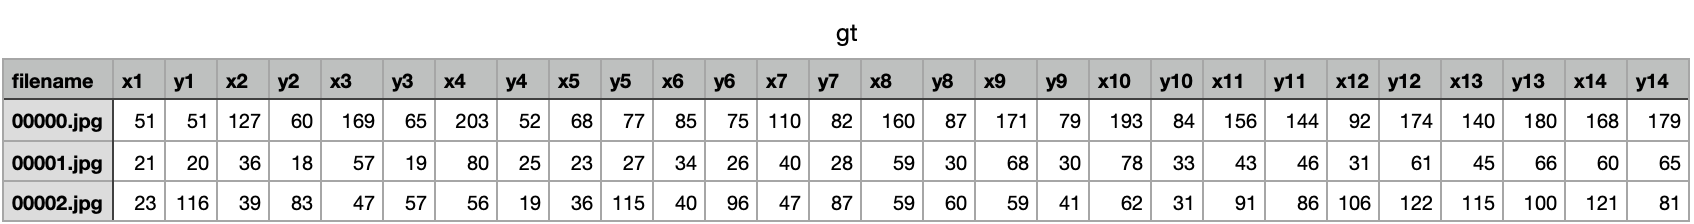


    * Create same from of the csv. DONE
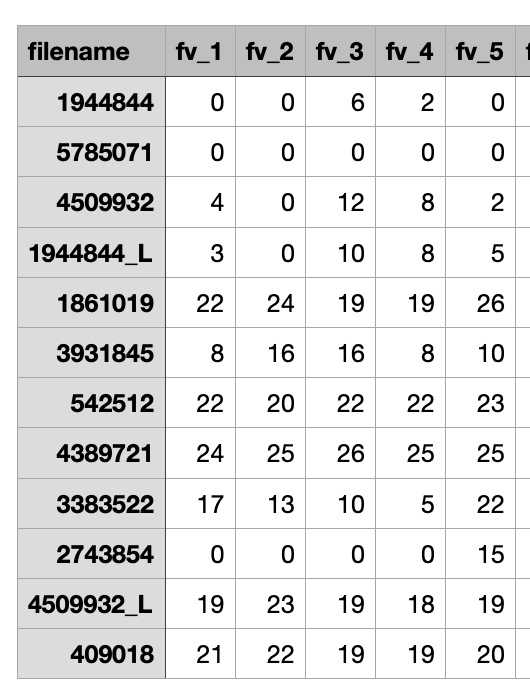
    
    

## 2022-09-15
    * add model Visualization
    * add grandent activation map
    

## keypoints regression



### Load and preprocess data

Script `get_data.py` unpacks data — images and labelled points. 6000 images are located in `images` folder and keypoint coordinates are in `gt.csv` file. Run the cell below to unpack data.

In [34]:
# from get_data import unpack
# unpack('facial-keypoints-data.zip')

Now you have to read `gt.csv` file and images from `images` dir. File `gt.csv` contains header and ground truth points for every image in `images` folder. It has 29 columns. First column is a filename and next 28 columns are `x` and `y` coordinates for 14 facepoints. We will make following preprocessing:
1. Scale all images to resolution $100 \times 100$ pixels.
2. Scale all coordinates to range $[-0.5; 0.5]$. To obtain that, divide all x's by width (or number of columns) of image, and divide all y's by height (or number of rows) of image and subtract 0.5 from all values.

Function `load_imgs_and_keypoint` should return a tuple of two numpy arrays: `imgs` of shape `(N, 100, 100, 3)`, where `N` is the number of images and `points` of shape `(N, 28)`.

In [35]:
import os
# set log level should be before import tf, to skip "TF_ENABLE_AUTO_MIXED_PRECISION has no effect"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# INFO messages are not printed.
# This must be run before loading other modules.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [36]:
### Useful routines for preparing data
import numpy as np
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize
import csv, cv2
# import os
import skimage


import tensorflow as tf # replace all keras layers

In [37]:
# take 3000 image to memory take 10mins, we should write it into tf.data 

In [38]:
%%time

img_size = 1024 # 224 #500 #50
#num_imgs = 2 #300 #3000 # take [3000:2*3000]  leave head-3000

# def load_imgs_and_keypoints(dirname='PCGA-points'):
#     # Write your code for loading images and points here
    
#     points_dict={}
#     with open("./FV_image_value_0927.csv", 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         count=0
#         for row in csvreader:
#             if count==0:
#                 count+=1
#                 continue
#             points_dict[row[0]]= [int(x) for x in row[1:]]
#     print("Dict created")
    
    
#     folder = "/home/u3148947/data/PACG_0927/PACG_fovea_centered_fundus_crop/"
#     images = []
#     points = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
#         print(filename, os.path.join(folder,filename))
#         img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
#         cols,rows,_ = img.shape                                                          # org image 
#         if img is not None:
#             images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
#             filename = os.path.splitext(filename)[0]                                     # without ".jpg"
#             point = points_dict[filename]
#             print("  check---", point, img.shape)
            
# #             for i in range(52):                                                        # fv do need rescal
# #                 """ convert xy to [-0.5, 0.5]
# #                     why?
# #                 """
# #                 print("  check---", "p14#", i)
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i] = point[2*i]/cols - 0.5
# #                 print("  check---", "org2nor", point[2*i])
# #                 point[2*i+1] = point[2*i+1]/rows - 0.5

#             print("  check---", point)
#             points.append(point)
      
#     images = np.array(images)
#     points = np.array(points)
# #     points = sort_points(points)
#     print(images.shape,points.shape)
    
#     return images, points

# imgs, points = load_imgs_and_keypoints()



def load_imgs_and_keypoints(CSV_name, dirname='PCGA-points'):
    # Write your code for loading images and points here
    # sources [10-05]
    FV_img = "POACG_crop"                          #視野
    FV_val = "POACG_FV_vaule"                    #視野值
    FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
    FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

    data_Dir = "~/data/PACG_data_20221005/"
    data_Dir = "/home/u3148947/data/PACG_data_20221005/"

    points_dict={}
    with open(CSV_name, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
    print("Dict created")
#     print(points_dict['0268212'])
#     print(points_dict.keys())
    filename_list = [name + ".jpg" for name in points_dict.keys()]
    
    folder = "/home/u3148947/data/PACG_data_20221005/POACG_crop"
    images = []
    points = []
#     for filename in sorted(os.listdir(folder)):#[num_imgs:2*num_imgs]:                   # all 12 images
    for filename in filename_list:                                                       # name from list to make sure all is fixed
        print("  check---", filename, os.path.join(folder,filename))
        img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB) # org image
        print("  check---", "img read")
        cols,rows,_ = img.shape                                                          # org image 
        
        if img is not None:
            images.append(skimage.transform.resize(img,(img_size,img_size)))             # resize image
            print("  check---", "image append")
            filename = os.path.splitext(filename)[0]                                     # without ".jpg"
            print("  check---", "filename rm .jpg")
            point = points_dict[filename]
            print("  check---", point, img.shape)
            
#             for i in range(52):                                                        # fv do need rescal
#                 """ convert xy to [-0.5, 0.5]
#                     why?
#                 """
#                 print("  check---", "p14#", i)
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i] = point[2*i]/cols - 0.5
#                 print("  check---", "org2nor", point[2*i])
#                 point[2*i+1] = point[2*i+1]/rows - 0.5

            print("  check---", point)
            points.append(point)
      
    images = np.array(images)
    points = np.array(points)
#     points = sort_points(points)
    print(images.shape,points.shape)
    
    return images, points



imgs_train, points_train = load_imgs_and_keypoints("FV_image_value_1005_train.csv")
imgs_val, points_val = load_imgs_and_keypoints("FV_image_value_1005_val.csv")

Dict created
  check--- 1084274.jpg /home/u3148947/data/PACG_data_20221005/POACG_crop/1084274.jpg
  check--- img read
  check--- image append
  check--- filename rm .jpg
  check--- [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 25, 25, 0, 12, 0, 4, 0, 0, 27, 30, 23, 20, 0, 4, 0, 26, 24, 18, 0, 0, 22, 22] (1024, 1024, 3)
  check--- [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 25, 25, 0, 12, 0, 4, 0, 0, 27, 30, 23, 20, 0, 4, 0, 26, 24, 18, 0, 0, 22, 22]
  check--- 3167782_L.jpg /home/u3148947/data/PACG_data_20221005/POACG_crop/3167782_L.jpg
  check--- img read
  check--- image append
  check--- filename rm .jpg
  check--- [27, 21, 27, 26, 28, 28, 27, 29, 29, 25, 30, 29, 26, 27, 29, 30, 27, 26, 28, 18, 30, 30, 28, 28, 29, 25, 25, 0, 30, 32, 32, 30, 27, 26, 26, 28, 29, 30, 31, 29, 27, 23, 28, 29, 29, 28, 29, 27, 29, 26, 27, 27] (1024, 1024, 3)
  check--- [27, 21, 27, 26, 28, 28, 27, 29, 29, 25, 30, 29

## tfds shuffle 
    NO we are not use tfda currently!!

In [39]:
# tfds shuffle 
# train_all = tf.data.Dataset.zip((imgs_train, points_train))
# train_all = train_all.shuffle(50, reshuffle_each_iteration=True)

In [40]:
!ls /home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg

ls: cannot access '/home/u3148947/data/PACG_data_20221005/POACG_crop/1084274jpg': No such file or directory


In [41]:
!ls -la /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg

-rw-r--r-- 1 u3148947 TRI108216 199625 Sep  8 10:57 /home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0409018.jpg


In [42]:
# check point normaization
0/94 - 0.5

-0.5

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  3,  0,  0,  0, 25, 25,  0, 12,
        0,  4,  0,  0, 27, 30, 23, 20,  0,  4,  0, 26, 24, 18,  0,  0, 22,
       22])

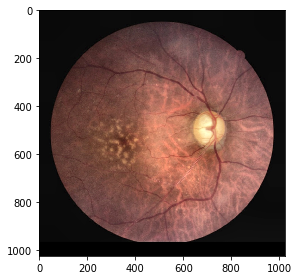

In [43]:
# Example of output
%matplotlib inline
from skimage.io import imshow
# imshow(imgs[0])
# points[0]

imshow(imgs_train[0])
points_train[0]

### Visualize data

Let's prepare a function to visualize points on image. Such function obtains two arguments: an image and a vector of points' coordinates and draws points on image (just like first image in this notebook).

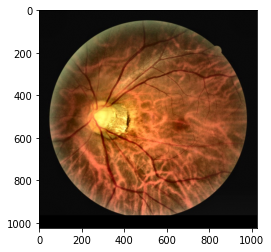

In [44]:
import matplotlib.pyplot as plt
# Circle may be useful for drawing points on face
# See matplotlib documentation for more info
from matplotlib.patches import Circle

def visualize_points(img, points):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(14):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))
    
# visualize_points(imgs[1], points[1])
visualize_points(imgs_train[1], points_train[1])

In [45]:
def visualize_points1(img, points,j):
    plt.figure()
    plt.imshow(img)
    cols,rows,_ = img.shape
    patches=[]
    r=0.4
    fig = plt.gcf()
    ax = fig.gca()
    for i in range(j,j+1):
        ax.add_artist((Circle(((points[2*i]+0.5)*cols, (points[2*i+1]+0.5)*rows), r, color='r')))

### Train/val split

Run the following code to obtain train/validation split for training neural network.

In [46]:
# comment ! IF use fixed val_list

# from sklearn.model_selection import train_test_split
# imgs_train, imgs_val, points_train, points_val = train_test_split(imgs, points, random_state=42, test_size=0.1)

### Simple data augmentation

For better training we will use simple data augmentation — flipping an image and points. Implement function flip_img which flips an image and its' points. Make sure that points are flipped correctly! For instance, points on right eye now should be points on left eye (i.e. you have to mirror coordinates and swap corresponding points on the left and right sides of the face). VIsualize an example of original and flipped image.

For correct NN training, the augmented photos should have the facial keypoints listed in the same order. The 14 keypoints are present in the original dataset in the below order. When the image is flipped, we need to invert the x-coordinate of the point, as well as place in on the opposite side of the face. 

0: left eyebrow, outer

1: left eyebrow, inner

2: right eyebrow, inner

3: right eyebrow, outer

4: left eye, outer

5: left eye, center

6: left eye, inner

7: right eye, inner

8: right eye, center

9: right eye, outer

10: nose center

11: mouth, left

12: mouth, center 

13: mouth, right

In [47]:
len(imgs_train)

244

In [48]:
len(imgs_val)

27

### this x.y location flip is not working for FV-value, SO WE SKIP THIS AUG.

    array([17, 13, 10,  5, 22, 25, 21, 17, 18,  8, 16, 23, 23, 11,  2, 18, 20,
       21, 18, 20, 25,  0,  7,  0, 22, 29, 24, 26, 28, 28, 29, 27,  0, 25,
       26, 29, 29, 29, 28, 26, 25, 24, 25, 26, 26, 25, 28, 30, 28, 26, 26,
       24])
       
       to
       
       array([-21.,  17., -22.,  25., -10.,   5., -17.,  13., -18.,  20., -20.,
        21.,  -2.,  18., -23.,  11., -16.,  23., -18.,   8., -25.,   0.,
       -24.,  26., -22.,  29.,  -7.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])


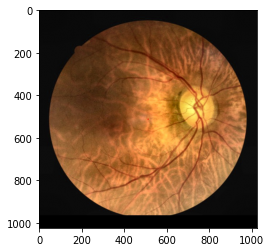

In [49]:
def flip_img(img, points):
    img_flip = img[:, ::-1]
    points_flip = np.zeros(points.shape)
    flip_indices = [3,2,1,0,9,8,7,6,5,4,10,13,12,11]
    for i in range(14):
        points_flip[2*i] = -points[2*flip_indices[i]]
        points_flip[2*i+1] = points[2*flip_indices[i]+1]
    return img_flip, points_flip

# f_img, f_points = flip_img(imgs[6], points[6])
f_img, f_points = flip_img(imgs_train[6], points_train[6])
visualize_points(f_img, f_points)

In [50]:
f_points

array([-11.,   6.,   0.,   7.,   0.,   0.,   0.,   0., -16.,  18., -21.,
        19., -25.,  22., -19.,  18.,  -2.,  18., -20.,  16., -26.,  29.,
       -16.,   0., -24.,  20., -28.,  26.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

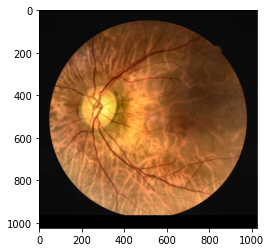

In [51]:
visualize_points(imgs_train[6], points_train[6])

In [52]:
points_train[6]

array([ 0,  0,  0,  0,  0,  7, 11,  6, 20, 16,  2, 18, 19, 18, 25, 22, 21,
       19, 16, 18, 26, 29, 28, 26, 24, 20, 16,  0, 27, 30, 28, 28, 24, 23,
       14, 24, 26, 28, 29, 28, 23, 14, 22, 26, 25, 23, 18, 17, 24, 25, 21,
        9])

Time to augment our training sample. Apply flip to every image in training sample. As a result you should obtain two arrays: `aug_imgs_train` and `aug_points_train` which contain original images and points along with flipped ones.

In [53]:
aug_imgs_train = []
aug_points_train = []

for i in range(imgs_train.shape[0]):
    img_flip, points_flip = flip_img(imgs_train[i],points_train[i])
    aug_imgs_train.append(imgs_train[i])
    aug_imgs_train.append(img_flip)
    aug_points_train.append(points_train[i])
    aug_points_train.append(points_flip)

aug_imgs_train = np.array(aug_imgs_train)
aug_points_train = np.array(aug_points_train)
print(imgs_train.shape, points_train.shape)
print(aug_imgs_train.shape, aug_points_train.shape)

(244, 1024, 1024, 3) (244, 52)
(488, 1024, 1024, 3) (488, 52)


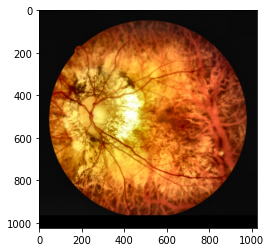

In [54]:
visualize_points1(aug_imgs_train[5], aug_points_train[5],1)

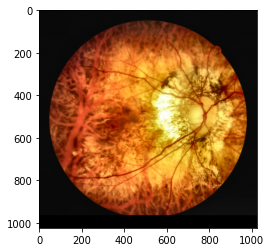

In [55]:
visualize_points1(aug_imgs_train[4], aug_points_train[4],1)

### Network architecture and training

Now let's define neural network regressor. It will have 28 outputs, 2 numbers per point. The precise architecture is up to you. We recommend to add 2-3 (`Conv2D` + `MaxPooling2D`) pairs, then `Flatten` and 2-3 `Dense` layers. Don't forget about ReLU activations. We also recommend to add `Dropout` to every `Dense` layer (with p from 0.2 to 0.5) to prevent overfitting.


In [56]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.layers.advanced_activations import LeakyReLU
# from keras.initializers import glorot_uniform


# chage to tf.keras.layers. and tf.keras.layers.advanced_activations. tf.keras.initializers.

model = tf.keras.Sequential(name="KPR-model101")

model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape=(img_size, img_size, 3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3,3), padding="same",kernel_initializer=tf.keras.initializers.glorot_uniform()))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))  

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform()))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

model.add(tf.keras.layers.Dropout(0.5)) 

model.add(tf.keras.layers.Dense(64,kernel_initializer=tf.keras.initializers.glorot_uniform()))
model.add(tf.keras.layers.LeakyReLU(alpha=0))

model.add(tf.keras.layers.Dense(52,kernel_initializer=tf.keras.initializers.glorot_uniform())) #28 -> 52


In [57]:
NUM_KEYPOINTS = 52
IMG_SIZE = img_size

# def get_model():
#     # Load the pre-trained weights of MobileNetV2 and freeze the weights
#     backbone = tf.keras.applications.MobileNetV2(
#         weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
#     )
#     backbone.trainable = False

#     inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
#     x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
#     x = backbone(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
#     )(x)
#     outputs = tf.keras.layers.SeparableConv2D(
#         NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
#     )(x)

#     return tf.keras.Model(inputs, outputs, name="keypoint_detector")


def get_model():
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = tf.keras.applications.DenseNet201(
        weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    backbone.trainable = False

    inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE, 3))
    x = tf.keras.applications.densenet.preprocess_input(inputs)
    x = backbone(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
    )(x)
    outputs = tf.keras.layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
    )(x)
    
    outputs = tf.keras.layers.Flatten()(outputs)
    outputs = tf.keras.layers.Dense(128,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    outputs = tf.keras.layers.LeakyReLU(alpha=0.1)(outputs)
    outputs = tf.keras.layers.Dense(52,kernel_initializer=tf.keras.initializers.glorot_uniform())(outputs)
    
    return tf.keras.Model(inputs, outputs, name="KPR-model-kerasApp")

model = get_model()

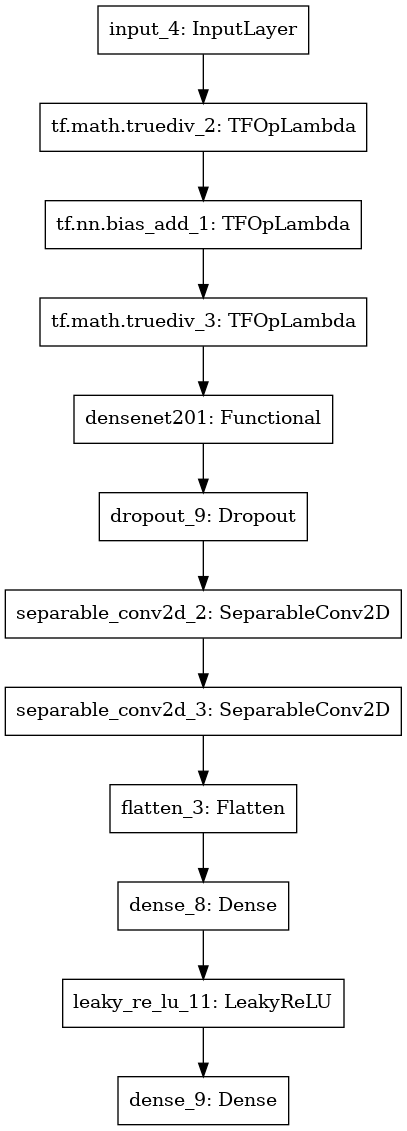

In [58]:
# model Visualization

# from tf.keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file='KPR-model-kerasApp_1005.png')

In [59]:
model.summary()

Model: "KPR-model-kerasApp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1024, 1024, 3)]   0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 1024, 1024, 3)     0         
_________________________________________________________________
tf.nn.bias_add_1 (TFOpLambda (None, 1024, 1024, 3)     0         
_________________________________________________________________
tf.math.truediv_3 (TFOpLambd (None, 1024, 1024, 3)     0         
_________________________________________________________________
densenet201 (Functional)     (None, 32, 32, 1920)      18321984  
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 1920)      0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 2)  

    Model: "KPR-model101"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_12 (Conv2D)           (None, 1024, 1024, 16)    448       
    _________________________________________________________________
    leaky_re_lu_20 (LeakyReLU)   (None, 1024, 1024, 16)    0         
    _________________________________________________________________
    max_pooling2d_12 (MaxPooling (None, 512, 512, 16)      0         
    _________________________________________________________________
    dropout_25 (Dropout)         (None, 512, 512, 16)      0         
    _________________________________________________________________
    conv2d_13 (Conv2D)           (None, 512, 512, 32)      4640      
    _________________________________________________________________
    leaky_re_lu_21 (LeakyReLU)   (None, 512, 512, 32)      0         
    _________________________________________________________________
    max_pooling2d_13 (MaxPooling (None, 256, 256, 32)      0         
    _________________________________________________________________
    dropout_26 (Dropout)         (None, 256, 256, 32)      0         
    _________________________________________________________________
    conv2d_14 (Conv2D)           (None, 256, 256, 64)      18496     
    _________________________________________________________________
    leaky_re_lu_22 (LeakyReLU)   (None, 256, 256, 64)      0         
    _________________________________________________________________
    max_pooling2d_14 (MaxPooling (None, 128, 128, 64)      0         
    _________________________________________________________________
    dropout_27 (Dropout)         (None, 128, 128, 64)      0         
    _________________________________________________________________
    flatten_4 (Flatten)          (None, 1048576)           0         
    _________________________________________________________________
    dense_14 (Dense)             (None, 128)               134217856 
    _________________________________________________________________
    leaky_re_lu_23 (LeakyReLU)   (None, 128)               0         
    _________________________________________________________________
    dropout_28 (Dropout)         (None, 128)               0         
    _________________________________________________________________
    dense_15 (Dense)             (None, 64)                8256      
    _________________________________________________________________
    leaky_re_lu_24 (LeakyReLU)   (None, 64)                0         
    _________________________________________________________________
    dense_16 (Dense)             (None, 52)                3380      
    =================================================================
    Total params: 134,253,076
    Trainable params: 134,253,076
    Non-trainable params: 0
    _________________________________________________________________

Time to train! Since we are training a regressor, make sure that you use mean squared error (mse) as loss. Feel free to experiment with optimization method (SGD, Adam, etc.) and its' parameters.

In [60]:
# ModelCheckpoint can be used for saving model during training.
# Saved models are useful for finetuning your model 
# See keras documentation for more info
# from tf.keras.callbacks import ModelCheckpoint
# from tf.keras.optimizers import SGD, Adam

# change to
# tf.keras.callbacks.ModelCheckpoint
# tf.keras.optimizers.SGD
# tf.keras.optimizers.Adam

# Choose optimizer, compile model and run training
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics=['mean_squared_error', 'mean_absolute_error', tf.keras.metrics.RootMeanSquaredError()])

In [61]:
BATCH_SIZE = 2
EPOCHS = 200

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

#best_model = f'ZhuYin/best_model/Zhuyin_encoder_cleanGT_nNet_ckpt/' + model_name + "_" + str(img_size) + 'x' + str(img_size) + '_' + str(MULTI_BATCH_SIZE) + '_{epoch:04}' # + {epoch} for save every best ckpt models
best_model = "best_my_model_1006_bs2_p0_e200/kpg_ckpt"
save_best_model = tf.keras.callbacks.ModelCheckpoint(filepath=best_model, monitor='val_loss', save_weights_only=True, save_best_only=True, mode='auto', verbose=1)

# lr_schedul = tf.keras.callbacks.LearningRateScheduler(CosineDecayCLRWarmUpLSW_2)


callbacks=[early_stop, 
           save_best_model, 
           #tensorboard_callback, 
           #lr_schedul, 
           #PrintLR(), # teake 4~5 sec per epoch!!!!
          ] # evl_img_callback],

# callbacks=callbacks

In [62]:
%%time

hist = model.fit(
    #aug_imgs_train, aug_points_train,          # note that: x,y flip is not work for FV-value 
    imgs_train, points_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(imgs_val, points_val),
    shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
    verbose=1,
    callbacks=callbacks,
)

Epoch 1/200
122/122 [==============================] - 61s 263ms/step - loss: 135.1497 - mean_squared_error: 135.1497 - mean_absolute_error: 9.1619 - root_mean_squared_error: 11.6254 - val_loss: 51.4500 - val_mean_squared_error: 51.4500 - val_mean_absolute_error: 5.0626 - val_root_mean_squared_error: 7.1729

Epoch 00001: val_loss improved from inf to 51.45002, saving model to best_my_model_1006_bs2_p0_e200/kpg_ckpt
Epoch 2/200
122/122 [==============================] - 9s 71ms/step - loss: 104.4354 - mean_squared_error: 104.4354 - mean_absolute_error: 8.2473 - root_mean_squared_error: 10.2194 - val_loss: 54.5617 - val_mean_squared_error: 54.5617 - val_mean_absolute_error: 5.6985 - val_root_mean_squared_error: 7.3866

Epoch 00002: val_loss did not improve from 51.45002
Epoch 3/200
122/122 [==============================] - 25s 208ms/step - loss: 104.6840 - mean_squared_error: 104.6840 - mean_absolute_error: 8.1327 - root_mean_squared_error: 10.2315 - val_loss: 73.7060 - val_mean_squared

In [63]:
# model.save_weights('my_model_weights_1006_bs2_p0_e200.h5')s

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [64]:
# model.load_weights('my_model_weights.h5')

$\color{color-code}{your-text-here}$

<font color=#0fb503>other color</font>

# Ploting

In [65]:
"因為loss是用mse算出 因此兩者相同"

'因為loss是用mse算出 因此兩者相同'

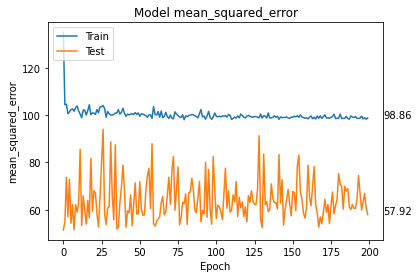

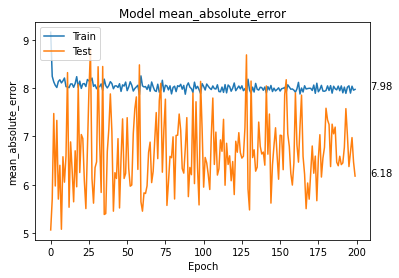

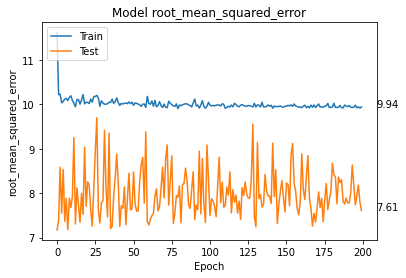

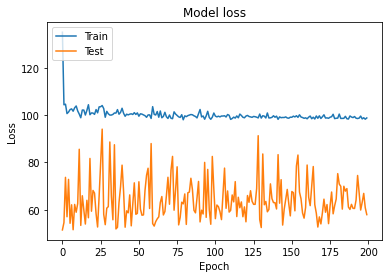

In [66]:
import matplotlib.pyplot as plt

history = hist

# mse
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_squared_error']
vr=history.history['val_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('_1006_bs2_p0_e200_KPR-model_mean_squared_error.jpg', dpi=150)
plt.show()


# mae
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


tr=history.history['mean_absolute_error']
vr=history.history['val_mean_absolute_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('_1006_bs2_p0_e200_KPR-model_mean_absolute_error.jpg', dpi=150)
plt.show()


# RMSE root_mean_squared_error
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

tr=history.history['root_mean_squared_error']
vr=history.history['val_root_mean_squared_error']
plt.annotate(f'{vr[-1]:.2f}', xy=(1, vr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')#, arrowprops=dict(arrowstyle="->", connectionstyle="angle3"),)
plt.annotate(f'{tr[-1]:.2f}', xy=(1, tr[-1]), xytext=(0, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.savefig('_1006_bs2_p0_e200_KPR-model_root_mean_squared_error.jpg', dpi=150)
plt.show()


# loss = mean_squared_error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [67]:
tr[-1]

9.942987442016602

# Visualize results for PCGA

### Reload trained weight

In [68]:
#restore_model = tf.keras.models.load_model('my_model_weights.h5')

# # reload the weights not the load_model !
# model.load_weights('my_model_weights.h5')

# realod from ckpt save_weight_only, "best_my_model_1005/kpg_ckpt"
model.load_weights(best_model)

### Predict validation images

In [69]:
val_points_pred = model.predict(imgs_val) # imgs_train imgs_val

In [70]:
val_points_pred

array([[18.044125, 18.21079 , 17.895353, ..., 25.05424 , 27.001514,
        24.206142],
       [18.044125, 18.21079 , 17.895353, ..., 25.05424 , 27.001514,
        24.206142],
       [18.044125, 18.21079 , 17.895353, ..., 25.05424 , 27.001514,
        24.206142],
       ...,
       [18.044125, 18.21079 , 17.895353, ..., 25.05424 , 27.001514,
        24.206142],
       [18.044125, 18.21079 , 17.895353, ..., 25.05424 , 27.001514,
        24.206142],
       [18.044125, 18.21079 , 17.895353, ..., 25.05424 , 27.001514,
        24.206142]], dtype=float32)

In [71]:
points_val

array([[ 3,  8, 18, ..., 27, 25, 24],
       [20, 11, 16, ..., 21, 19, 19],
       [19, 18, 22, ..., 25, 24, 19],
       ...,
       [10, 18, 20, ..., 23, 24, 27],
       [28, 28, 29, ..., 29, 23, 25],
       [24, 20, 23, ..., 23, 22, 28]])

## Restore FV-value back to FV_img (gray scale map) 
    [2022-09-29]
    FV list rows number
    
    4
    6
    8
    8
    8
    8
    6
    4

    * reshape 52 to [8, 8] pad zeros [OK]
    * reshape [8,8] to [640, 640] and pad with Interpolation [NO, better keep it as it is. even for pix2pix training.]
    * plot as gray image [OK]

In [72]:
# check one fv_value
print(f"52 value: \n\t{points_val[0]}")
print(f"shape 1: \n\t{points_val[0].shape}")
print(f"length 1: \n\t{len(points_val[0])}")
# points_val[0]

52 value: 
	[ 3  8 18 10 24 23  3 21 22 23 20 26 26 26 24 24 26 23 25 14 28 30 29 28
 25 20 29  0 10 31 31 29 28 23 27 30 31 30 31 30 29 26 23 27 27 29 29 25
 28 27 25 24]
shape 1: 
	(52,)
length 1: 
	52


In [73]:
np.__version__

'1.19.4'

In [74]:
# points_val[0].reshape(8,8)

In [75]:
# np.reshape(points_val[0], (8,8))

In [76]:
# check how to pad zero to row

sampl_arr_1 = points_val[0]
print(sampl_arr_1[:4])

sampl_arr_1 = np.pad(sampl_arr_1[:4], ((2, 2)), 'constant',constant_values=(0))
print(sampl_arr_1)

[ 3  8 18 10]
[ 0  0  3  8 18 10  0  0]


In [77]:
def reshape_FV_value_list(fv_list):
    rank = [
        4,
        6,
        8,
        8,
        8,
        8,
        6,
        4]
#     gt_ = [
#      23 21 24 18
#      24 24 25 20 23 27
#      26 27 22 25 24 26 26 23 
#      29 23 27 28  0 27 26 25 
#      25  0 28 28 29 29 29 28 
#      30 30 30 29 26 29 28 27 
#      29 27 23 27 28 27
#      25 27 24 24]
    
#     for i, idx in enumerate(rank):
#         print(f"rank: {i} {idx}")
        
#         arr_idx_1 = np.pad(sampl_arr_1[i:idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
        
#         print(arr_idx_1)
    
    tmp_arr = []
    steps = 0
    h_rows = 4
    for i, idx in enumerate(rank):
        #print(f"rank: {i} {idx}")
        
#         # 8-rows
#         if i == 0 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[0:idx], ((2, 2)), 'constant',constant_values=(0))
#         if i == 1 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[4:4+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 2 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[10:10+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 3 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[18:18+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 4 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[26:26+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 5 and idx == 8:
#             arr_idx_1 = np.pad(fv_list[34:34+idx], ((8-idx, 8-idx)), 'constant',constant_values=(0))
#         if i == 6 and idx == 6:
#             arr_idx_1 = np.pad(fv_list[42:42+idx], ((1, 1)), 'constant',constant_values=(0))
#         if i == 7 and idx == 4:
#             arr_idx_1 = np.pad(fv_list[48:48+idx], ((2, 2)), 'constant',constant_values=(0))


        # 8-rows in onece, half-rows = 4
        arr_idx_1 = np.pad(fv_list[steps : steps + idx], ((h_rows - int(idx/2), h_rows - int(idx/2))), 'constant',constant_values=(0))
        
        steps += idx
            
        tmp_arr.append(arr_idx_1)    
        
        #print(arr_idx_1)
    #print(tmp_arr)
    return np.vstack(tmp_arr)

In [78]:
reshape_fv = reshape_FV_value_list(points_val[0])

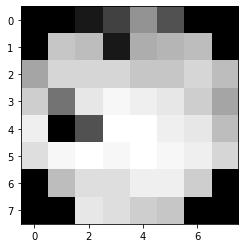

In [79]:
plt.imshow(reshape_fv, interpolation='nearest', cmap="gray")
plt.show()

In [80]:
reshape_fv_pred = reshape_FV_value_list(val_points_pred[0])

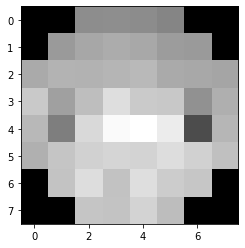

In [81]:
plt.imshow(reshape_fv_pred, interpolation='nearest', cmap="gray")
plt.show()

28.390848 float32 29 int64
MSE : 31.783982912075544
PSNR: 32.95389728311288
SSIM: 0.8322718763627858
28 29


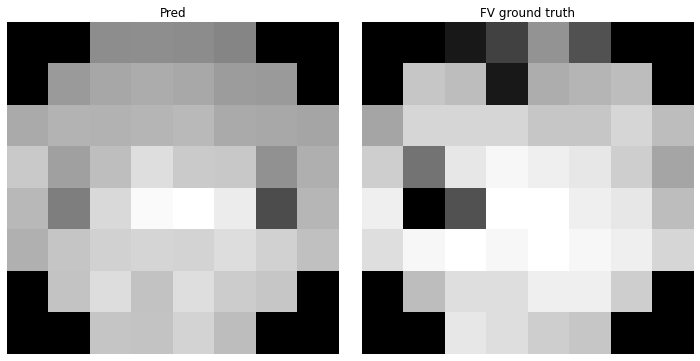

28.390848 float32 26 int64
MSE : 91.91823182440999
PSNR: 28.70297473595636
SSIM: 0.6958708465520276
28 26


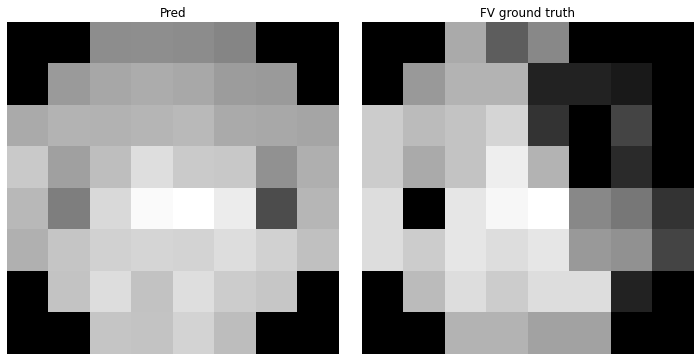

28.390848 float32 27 int64
MSE : 8.437460044395948
PSNR: 38.57332496431268
SSIM: 0.9529860447304248
28 27


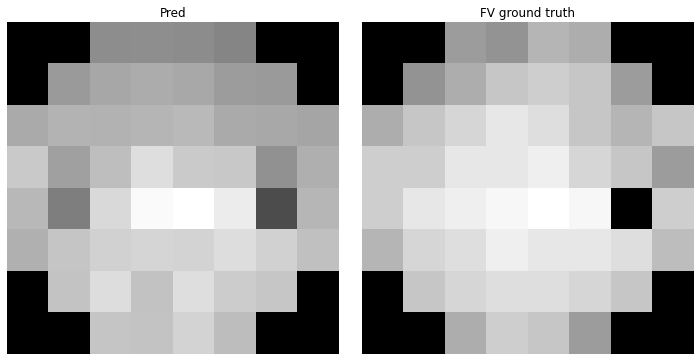

28.390848 float32 25 int64
MSE : 24.690885106098676
PSNR: 33.735009788845204
SSIM: 0.9002617050472796
28 25


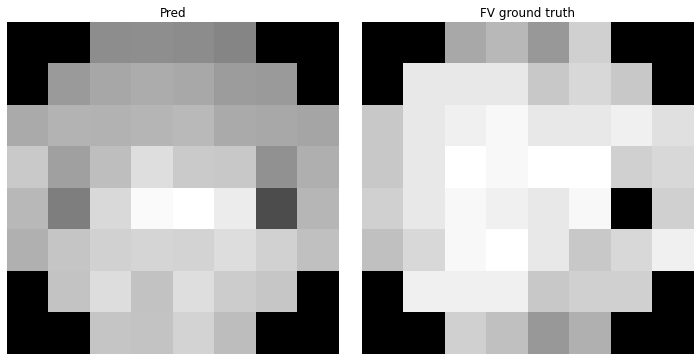

28.390848 float32 28 int64
MSE : 64.2128392849088
PSNR: 30.15791175117959
SSIM: 0.7567679109464472
28 28


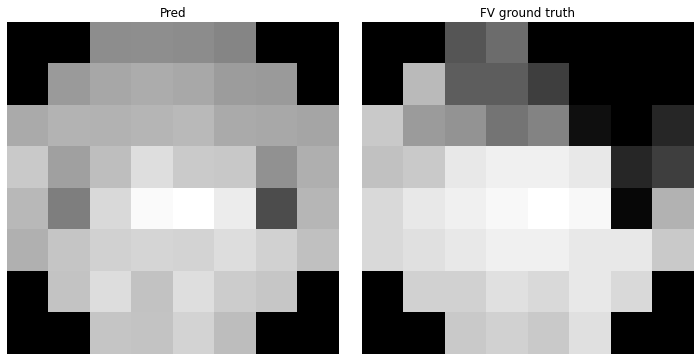

28.390848 float32 31 int64
MSE : 48.514834502708936
PSNR: 30.849803296467158
SSIM: 0.8729368125234449
28 31


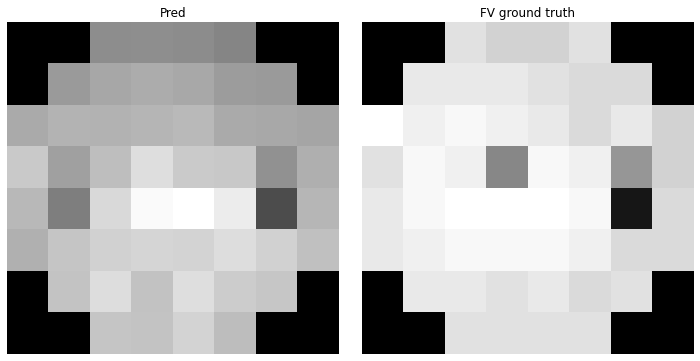

28.390848 float32 28 int64
MSE : 24.210648873817945
PSNR: 33.77962947741804
SSIM: 0.91733894379807
28 28


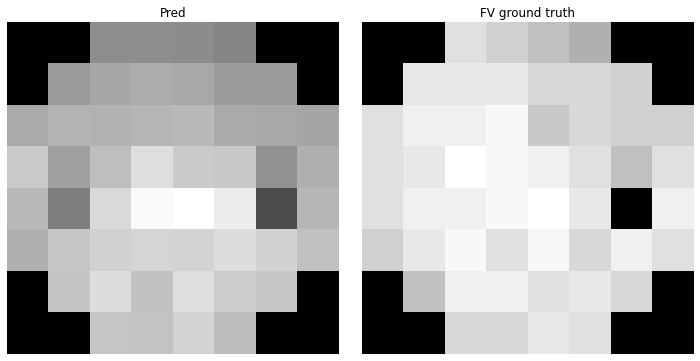

28.390848 float32 26 int64
MSE : 9.825294831764722
PSNR: 37.63741179183997
SSIM: 0.938640677473912
28 26


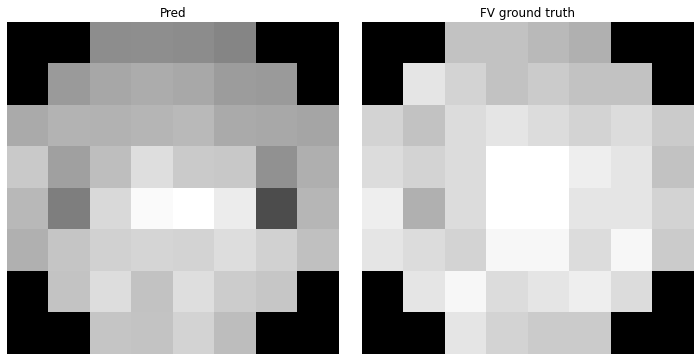

28.390848 float32 27 int64
MSE : 8.994343677532697
PSNR: 38.796879904017054
SSIM: 0.9517415677057871
28 27


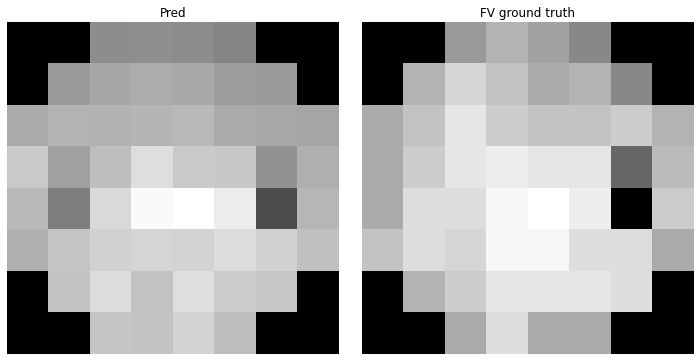

28.390848 float32 13 int64
MSE : 40.922159293663526
PSNR: 31.960144609149896
SSIM: 0.7957371382423857
28 13


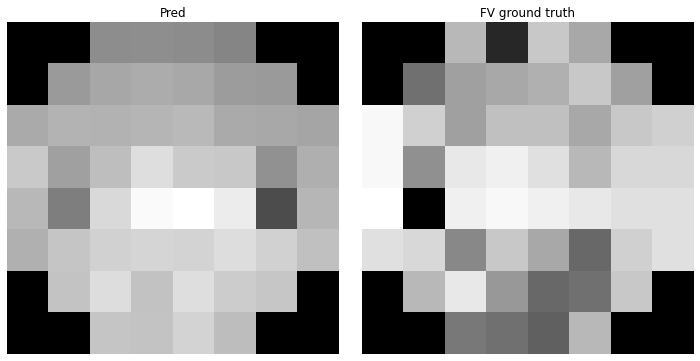

28.390848 float32 27 int64
MSE : 28.6122042331815
PSNR: 33.591889468667226
SSIM: 0.8619773629174574
28 27


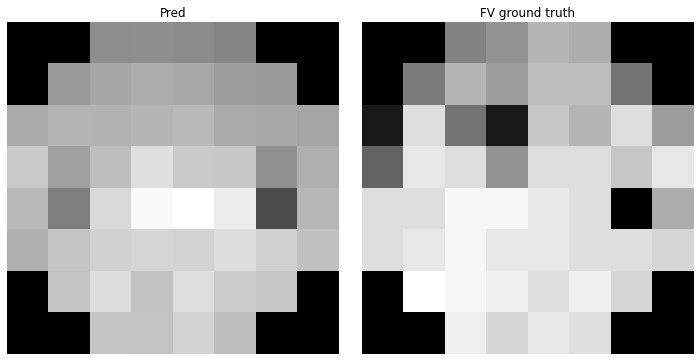

28.390848 float32 25 int64
MSE : 11.283464292061353
PSNR: 37.327696096793154
SSIM: 0.9415603063749765
28 25


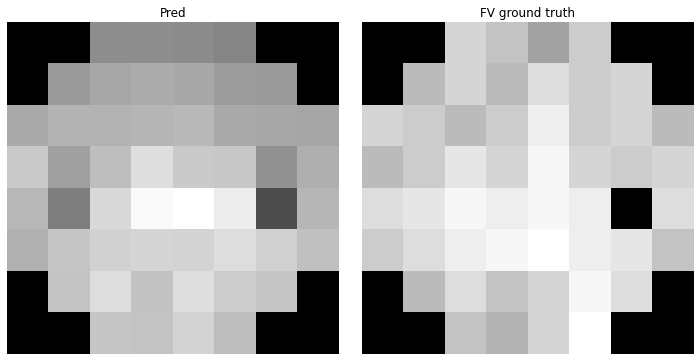

28.390848 float32 25 int64
MSE : 20.460477033627058
PSNR: 35.311242461512464
SSIM: 0.8942203524644846
28 25


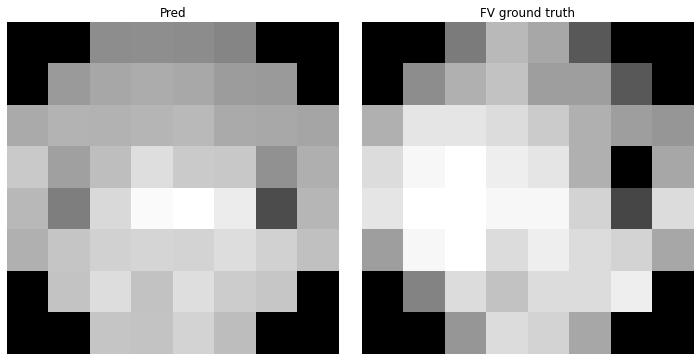

28.390848 float32 24 int64
MSE : 12.923539260399366
PSNR: 37.17257443501068
SSIM: 0.9197532403051317
28 24


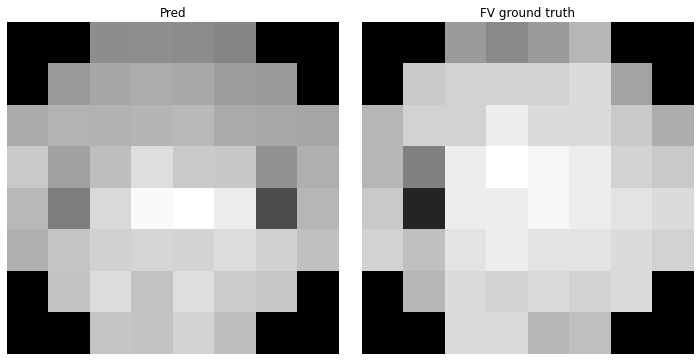

28.390848 float32 17 int64
MSE : 213.75903091765645
PSNR: 25.033836705833533
SSIM: 0.37127308357803224
28 17


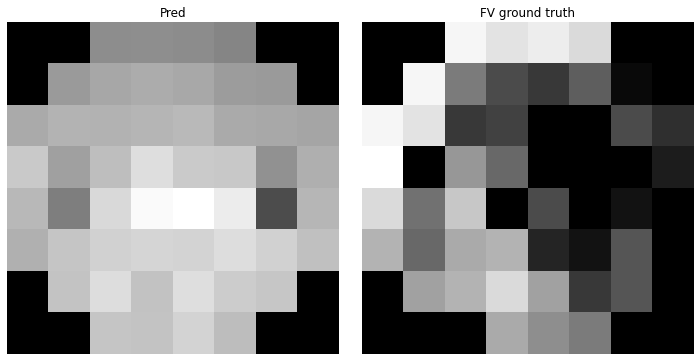

28.390848 float32 31 int64
MSE : 28.040369490158582
PSNR: 33.0644850863971
SSIM: 0.9262377815301825
28 31


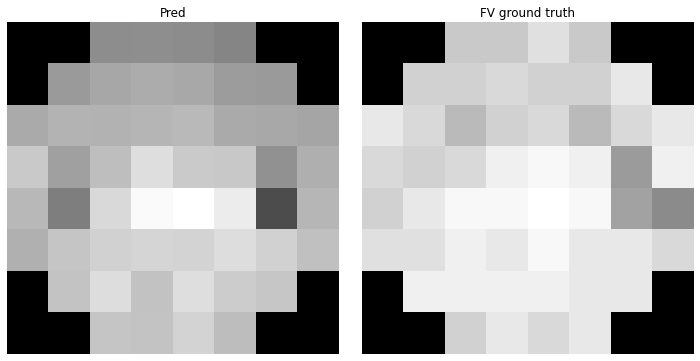

28.390848 float32 31 int64
MSE : 33.07616362906697
PSNR: 32.42318577705039
SSIM: 0.8796608791049585
28 31


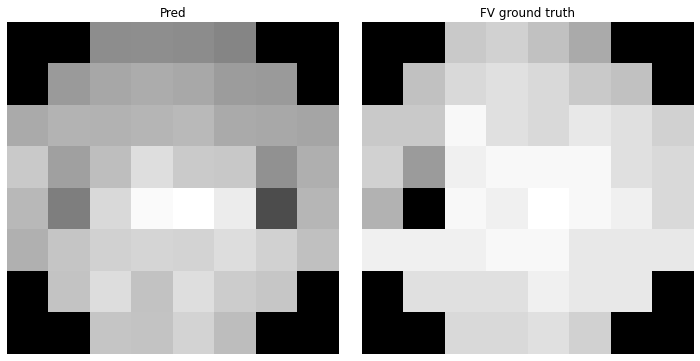

28.390848 float32 31 int64
MSE : 19.696474710476423
PSNR: 35.03649823177498
SSIM: 0.9067469669093381
28 31


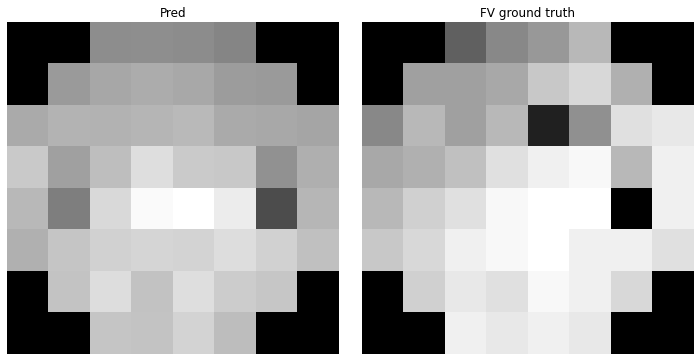

28.390848 float32 25 int64
MSE : 25.41036758757832
PSNR: 33.809632669764035
SSIM: 0.869807083687737
28 25


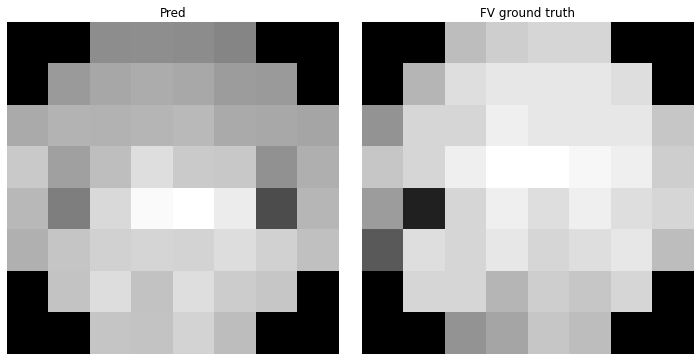

28.390848 float32 29 int64
MSE : 19.25759581662419
PSNR: 34.84445964531338
SSIM: 0.9044259735652357
28 29


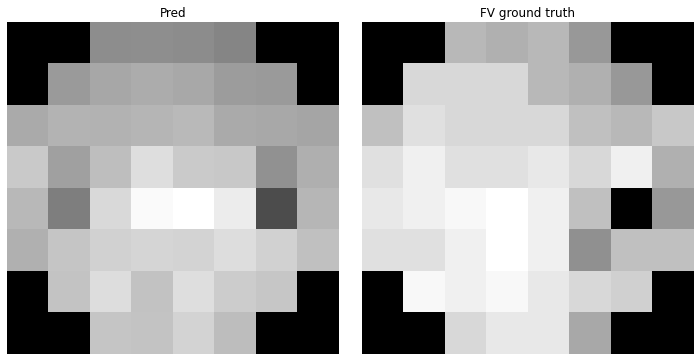

28.390848 float32 31 int64
MSE : 39.73614130355122
PSNR: 31.687033254334686
SSIM: 0.8704829599066646
28 31


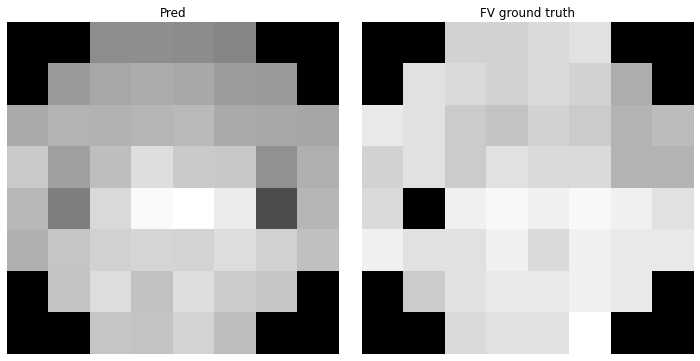

28.390848 float32 27 int64
MSE : 153.34314159489873
PSNR: 26.50124101255085
SSIM: 0.5735144861385311
28 27


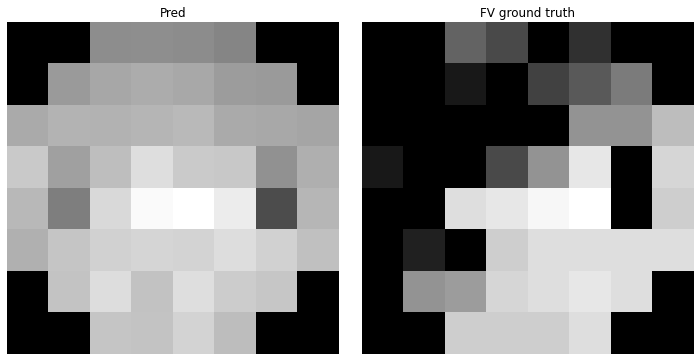

28.390848 float32 15 int64
MSE : 26.795308986675764
PSNR: 33.50448431112017
SSIM: 0.8582289220781898
28 15


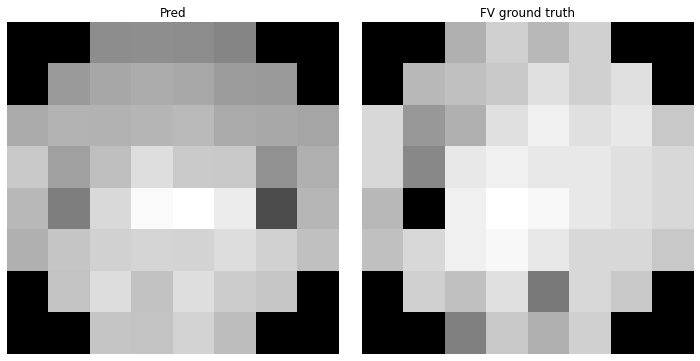

28.390848 float32 25 int64
MSE : 60.13121811486485
PSNR: 30.544759503478108
SSIM: 0.7310049330255368
28 25


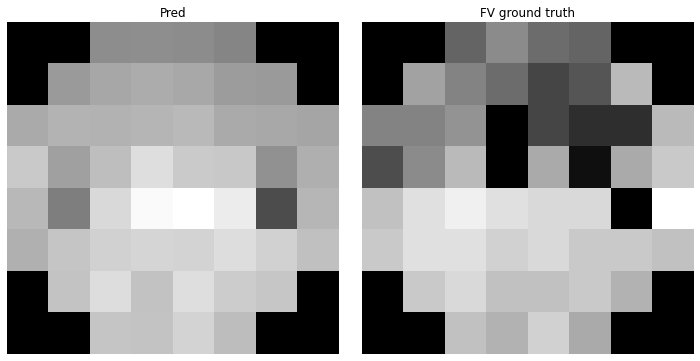

28.390848 float32 28 int64
MSE : 16.321450153362775
PSNR: 35.95596416654004
SSIM: 0.9132107168654435
28 28


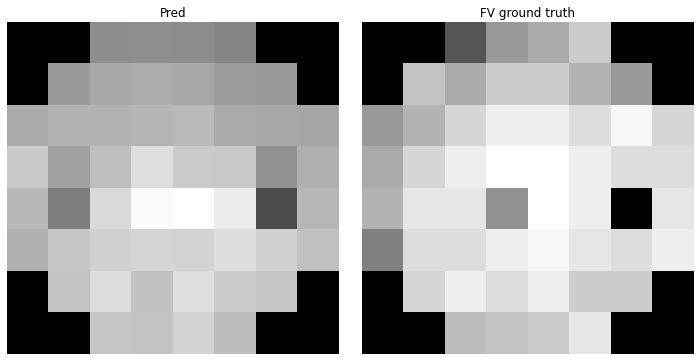

28.390848 float32 29 int64
MSE : 45.508158067238355
PSNR: 31.11000029339463
SSIM: 0.8380183149282183
28 29


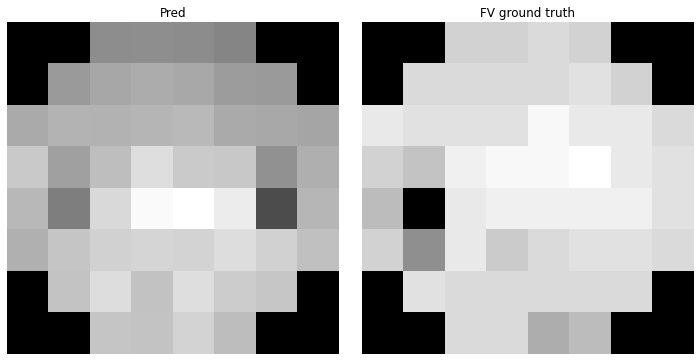

28.390848 float32 26 int64
MSE : 20.818901399147535
PSNR: 34.34852849439477
SSIM: 0.9053024938667981
28 26


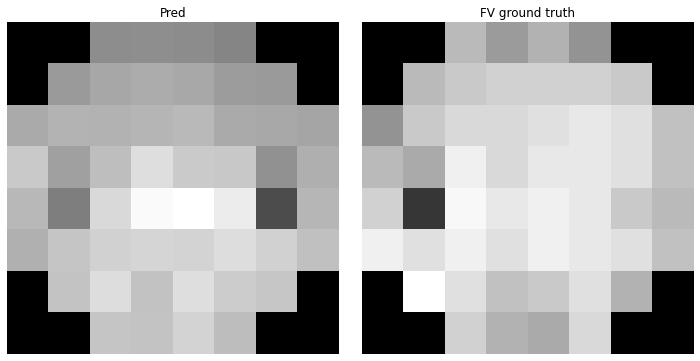

In [82]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error
"""
以MSE越小，則PSNR越大；所以PSNR越大，代表著圖像質量越好。
PSNR高於40dB說明圖像質量極好（即非常接近原始圖像），
在30—40dB通常表示圖像質量是好的（即失真可以察覺但可以接受），
在20—30dB說明圖像質量差；
PSNR低於20dB圖像不可接受

SSIM具有對稱性，即SSIM(x,y)=SSIM(y,x)
SSIM是一個0到1之間的數，越大表示輸出圖像和無失真圖像的差距越小，即圖像質量越好。當兩幅圖像一模一樣時，SSIM=1；

"""

# points_train, points_val
for i in range(len(points_val)):
    prd_p = reshape_FV_value_list(val_points_pred[i])
    gt_p = reshape_FV_value_list(points_val[i])
    
    #check single vale in the map
    print(prd_p[6,4], prd_p.dtype, gt_p[6,4], gt_p.dtype,)
    print(f'MSE : {mean_squared_error(prd_p, gt_p)}')
    print(f'PSNR: {peak_signal_noise_ratio(prd_p.astype(np.uint8), gt_p.astype(np.uint8))}')
    print(f'SSIM: {structural_similarity(prd_p.astype(np.uint8), gt_p.astype(np.uint8), full=False, multichannel=False)}')
    print(prd_p.astype(np.uint8)[6,4], gt_p.astype(np.uint8)[6,4])
    
    fig, axarr = plt.subplots(1,2,figsize=(10,5))
    axarr[0].imshow(prd_p, interpolation='nearest', cmap="gray")
    axarr[0].set_title("Pred")
    axarr[0].axis('off')

    axarr[1].imshow(gt_p, interpolation='nearest', cmap="gray")
    axarr[1].set_title("FV ground truth")
    axarr[1].axis('off')
   
    fig.tight_layout()
    plt.show()
    

In [83]:
640/8

80.0

In [84]:
val_zero = np.zeros((640,640))

In [85]:
val_zero.shape

(640, 640)

In [86]:
val_zero = np.zeros((52,52))

In [87]:
val_zero.shape

(52, 52)

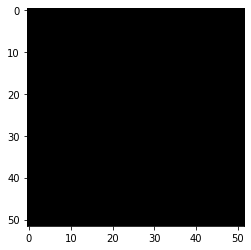

In [88]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [89]:
val_zero[:,:] = points_val[0]

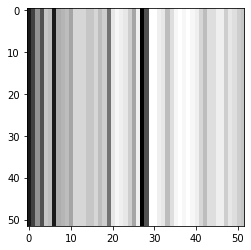

In [90]:
plt.imshow(val_zero, interpolation='nearest', cmap="gray")
plt.show()

In [91]:
points_val[0][:]

array([ 3,  8, 18, 10, 24, 23,  3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26,
       23, 25, 14, 28, 30, 29, 28, 25, 20, 29,  0, 10, 31, 31, 29, 28, 23,
       27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25,
       24])

In [92]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [93]:
mape(points_val[0], val_points_pred[0]).numpy()

310029760.0

In [94]:
mape(points_val[1], val_points_pred[1]).numpy()

2386487300.0

In [95]:
mae = tf.keras.losses.MeanAbsoluteError()

In [96]:
mae(points_val[0], val_points_pred[0]).numpy()

4.101781

In [97]:
mae(points_val[1], val_points_pred[1]).numpy()

7.4240155

In [98]:
mse = tf.keras.losses.MeanSquaredError()

In [99]:
mse(points_val[0], val_points_pred[0]).numpy()

39.11875

In [100]:
mse(points_val[1], val_points_pred[1]).numpy()

113.130135

In [101]:
mse([1], [3]).numpy()

4

### Visualize results (org keypoing plot)

Now visualize neural network results on several images from validation sample. Make sure that your network outputs different points for images (i.e. it doesn't output some constant).

In [102]:
val_points_pred = model.predict(imgs_val)

In [103]:
print(val_points_pred.shape)

(27, 52)


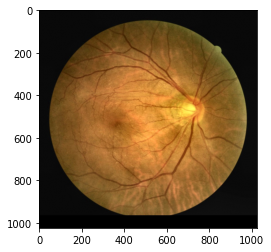

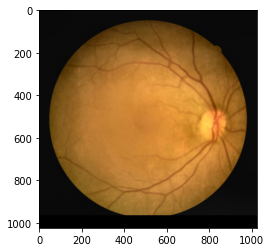

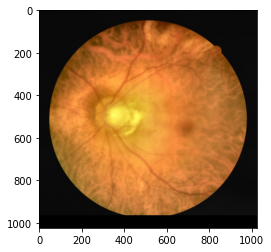

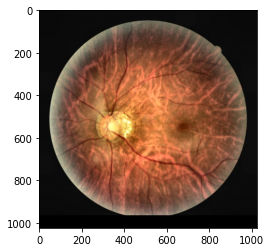

In [104]:
for i in range(11,15):
    visualize_points(imgs_val[i], val_points_pred[i])

Conclusion

The facial keypoints regression works quite well as seen above. Final MSE on Validation set ~ 0.013.

Due to my computational limitations, I trained the regressor on 50x50 images instead of 100x100 images. I also had to read half the dataset, train the NN, save the weights, and then train the other half. (Otherwise there was a MemoryError). This explains the extremely low loss that can be seen in the output of the model.fit. 